# Monte Carlo Simulation

* Modern version of the Monte Carlo method invented in the late 1940s by Stanislaw Ulam:
    * he was working on nuclear weapon projects at the Los Alamos National Laboratory. 
    

* Monte Carlo methods (or experiments) are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results: 
    * use randomness to solve problems that might be deterministic in principle;
    * mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution. 


* Monte Carlo (MC) methods are used when a closed-form solution for a property being studied cannot be developed (i.e. 
the probability of varying outcomes cannot be determined because of random variable interference). 
  * When faced with significant uncertainty in forecast or estimation it is not possible to just replace the uncertain variable with a single average number.
  * MC builds models of possible results where any factor that has inherent uncertainty (random variables) is replaced with a range of values (i.e. a PDF):


* Have a vast array of potential applications:
    * to estimate the likelihood that an asset price will move in a certain way;
    * to assess the risk that an entity will default;
    * to analyze derivatives such as options.


* Monte Carlo simulations have also countless applications outside finance: such as in meteorology, astronomy and particle physics.



### MC Algorithm Description

* identify the independent and dependent variables and define their domain $\Omega$ of possible inputs (probability distributions for the inputs);
* generate random samples from the domain $\Omega$;
* compute the output for the problem based on the randomly generated inputs;
* repeat the experiment $N$ number of times and aggregate the results.

#### Example

* Simulate results of rolling a die: 
    * involved random variable is the die outcome, hence $\Omega = {1, 2, 3,4,5,6}$
    * outcomes PDF is a uniform distribution (fair die).
    
    
* So the simulation consists of sampling uniform distributed integers between 1 and 6.


## Pseudo-Random Numbers

* Depending upon the number of uncertainties and their ranges and PDFs, a Monte Carlo simulation could involve thousands or tens of thousands of recalculations.


* For each simulation large amounts of random numbers sampled from many different probability distributions are computed:
    * the widespread of MC spurred the development of pseudorandom number generators. 


* Every programming language has libraries that allows to produce huge series of random numbers:
    * those numbers are generated by algorithms that take as input a *seed* which determines univokely the series; 
    * setting the same seed produce the same set of numbers every time (which is great for debugging purpouses).


* In $\tt{python}$ this module is `random`:
    * `seed` set the seed of the random number generator;
    * `random` returns a random number between 0 and 1 (with uniform probability);
    * `randint(min, max)` returns an integer random number between `min` and `max` (with uniform probability);
    * `sample(aList, k=n)` samples n elements from the list `aList`.


* As usual for a more detailed description check `help(random)`.

In [ ]:
# test seed number and sample
import random 

random.seed(1)
print(random.random())
print(random.random())

random.seed(2)
print(random.random())
print(random.random())

random.seed(1)
print(random.random())
print(random.random())

print (random.randint(1, 6))
a = ['a', 'b', 'c', 'd']
print (random.sample(a, 2))

0.13436424411240122
0.8474337369372327
0.9560342718892494
0.9478274870593494
0.13436424411240122
0.8474337369372327
1
['c', 'a']


* Below an example of uniform distribution.

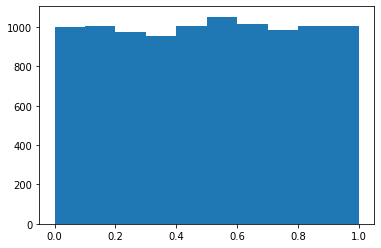

In [ ]:
# uniform distrobution
from matplotlib import pyplot as plt

numbers = []
for _ in range(10000):
    numbers.append(random.random())
    
plt.hist(numbers)
plt.show()

* Other modules provide random number generators: for example `numpy.random` 
    * allows, among others, to throw random numbers from a standard normal distribution.

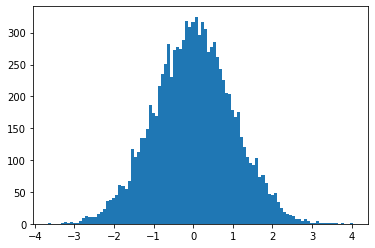

In [ ]:
# normal distribution
from numpy.random import normal, seed

seed(1)
numbers = []
for _ in range(10000):
    numbers.append(normal())
    
plt.hist(numbers, 100)
plt.show()

### Examples of Monte Carlo Simulation

#### Measure probability to get two kings drawing randomly two cards from a deck.


* Frequentist approach: $\textrm{probability of event} = \cfrac{\textrm{n. successes}}{\textrm{n. experiments}}$


$$P_\textrm{two kings} = \frac{4}{40} \cdot \frac{3}{39} = \frac{1}{130} \approx 0.0077$$

* Let's now try with a Monte Carlo simulation.

In [ ]:
# define the domain of inputs
from random import sample, seed

deck = ['A', 'K', 'J', 'Q', '7', '6', '5', '4', '3', '2'] * 4

seed(1)
def deck_sim(trials):
    successes = 0.0
    for _ in range(trials):
        cards = sample(deck, 2)
        if cards == ['K', 'K']:
            successes += 1
    return successes

trials = 10000
successes = deck_sim(trials)
print (successes/trials)

0.007


#### Determine $\pi$

* We know what to expect: $\pi\approx 3.141592653589793\ldots$. 

* Consider a circle of diameter $D$ inscribed in a square with side length $D$. 

<img src="https://drive.google.com/uc?id=11oFQLKqBvvOOaGM6hqURhXZS3i6BxWCI" width=200>

* The ratio of the areas of circle and square is

$$R = \cfrac{\textrm{Area Circle}}{\textrm{Area Square}} = \cfrac{\pi D^2/4}{D^2} = \cfrac{\pi}{4} $$

* Select 2 random numbers, $x_1$ and $x_2$, from the interval $[0,D]$;
* determine if the point $(x_1, x_2)$ lies within the circle (check if $\sqrt{x_1^2 + x_2^2} \le D$);
* keeping track of the total number of points within the circle and the number of generated points;
* compute $R = \cfrac{\textrm{n. points in circle}}{\textrm{n. generated points}}$;
* $\pi = R \cdot 4$.

In [ ]:
from random import random, seed
from math import sqrt

seed(1)
trials=5000000
in_circle = 0
for _ in range(trials):
    # assume D=1
    # set the origin in the center of the circle
    # generate x between -D/2 and +D/2
    x1 = random()-0.5
    x2 = random()-0.5
    r = sqrt(pow(x1, 2)+pow(x2, 2))
    # check if the distance of P(x1, x2) to the origin is <= circle radius
    if r <= 0.5:
        in_circle += 1
        
print (in_circle/trials*4)

3.141732


* The lower is the probability to estimate the higher has to be the number of simulations:
    * result precision depends on the number of "successes";
    * if the probability is small, we need to try many times;
    * this is apparent playing with the number of trials in the above simulation.
    
    
* Monte Carlo Simulation is not always the best approach to follow !

In [ ]:
from random import random, seed
from math import sqrt
import numpy as np

seed(1)
trials=[100, 1000, 10000, 100000, 1000000]
for i, t in enumerate(trials):
    in_circle = 0
    circ = []
    squa = []
    for _ in range(t):
        # assume D=1
        # set the origin in the center of the circle
        # generate x between -D/2 and +D/2
        x1 = random()-0.5
        x2 = random()-0.5
        r = sqrt(pow(x1, 2)+pow(x2, 2))
        # check if the distance of P(x1, x2) to the origin is <= circle radius
        if r <= 0.5:
            in_circle += 1
            circ.append((x1, x2))
        else:
            squa.append((x1, x2))
    print (in_circle/t*4)

3.12
3.096
3.1212
3.13956
3.142136


![](mc_vs_n_experiments.png)

## Accuracy of Monte Carlo Simulations

* Assume you don't know the probability of getting to K from two consecutive draws
    * what can be concluded from the result of a single MC experiment ?

In [ ]:
# define the domain of inputs
from random import sample, seed

deck = ['A', 'K', 'J', 'Q', '7', '6', '5', '4', '3', '2'] * 4

seed(97)
def deck_sim(trials):
    successes = 0.0
    for _ in range(trials):
        cards = sample(deck, 2)
        if cards == ['K', 'K']:
            successes += 1
    return successes

trials = 10000
successes = deck_sim(trials)
print (successes/trials)

0.0084


* Central Limit Theorem states: if $Y_1, Y_2,\dots, Y_n$ are random samples from a distribution $Y$ with true mean $\mu$ and variance $\sigma^{2}$, then when $n$ is sufficiently large, 

$$ \mu_n = \cfrac{1}{n}\sum_i^n Y_i $$

has approximately a normal distribution $\mathcal{N}(\mu, \sigma^2/n)$. 

* **This means that if one repeates a MC experiment (changing the seed of the random number generator) she should obtain results normally distributed around the *true* value $\mu$.**

In [ ]:
# define the domain of inputs
import numpy as np
from random import sample, seed

deck = ['A', 'K',  'Q', 'J', '2', '3', '4', '5', '6', '7'] * 4
experiments = 1000
trials = 10000
r = []
for e in range(experiments):
    seed(e)
    successes = 0.0
    for i in range(trials):
        cards = sample(deck, 2)
        if cards == ['K', 'K']:
            successes += 1
        
    r.append(successes/trials)

print ("Mean: ", np.mean(r))
print ("Std : ", np.std(r))

Mean:  0.0076885
Std :  0.0008707799664668452


<img src="https://drive.google.com/uc?id=1HZZA6cYl9-dG2wtYng3KqyogceLp1f_p" width="500">

* Hence:
$$\mu_n - \mu \approx \mathcal{N}(0, \sigma^2/n) $$

* So considering one single Monte Carlo experiment we can define an interval so that there is a certain probability to find $\mu$ in there.

$$ \mathbb{P}\left(\mu_n - \cfrac{1.96\sigma}{\sqrt{n}}\le \mu \le \mu_n + \cfrac{1.96\sigma}{\sqrt{n}}\right) = 0.95$$

<img src="https://drive.google.com/uc?id=18stWjXRiHr0NbRcwxD2Rq_KU3TjwnXRO">

* This interval is called **95% confidence interval** because the shaded part covers 95% of the total area under the Gaussian.
    * if you repeat many times the above simulation, the fraction of calculated confidence intervals that contains the true parameter $\mu$ would tend toward 95%.


* The most common intervals are 99% and 95% confidence levels and are respectively defined as $\pm \cfrac{2.57\sigma}{\sqrt{n}}$ and $\pm \cfrac{1.96\sigma}{\sqrt{n}}$. 
    

* The confidence interval can be used to assess the accuracy of the Monte Carlo simulation.
    * the root mean squared error on our best estimate of $\mu$ is:

$$ \mathrm{RMSE}(\mu_n) = \sqrt{\mathbb{E}((\mu_n - \mu )^2)} = \sqrt{\cfrac{\sigma^2}{n}}=\cfrac{\sigma}{\sqrt{n}} $$
where $\sigma^2 = \mathrm{Var}(Y)$.

* to get one more decimal digit of accuracy is like asking for an RMSE one tenth as large, and that requires a 100-fold increase in computation. 
* to get three more digits of accuracy requires one million times as much computation. 

#### Advantages
* Strong way of estimating uncertainty;
* simple & intuitive, this approach is quite easy to understand.

#### Disadvantages
* Computationally inefficient — when you have a large amount of variables bounded to different constraints, it requires a lot of time and a lot of computations to approximate a solution using this method;
* if poor parameters and constraints are input into the model then poor results will be given as outputs.

## Stochastic Processes

* If a system evolves according to a *deterministic* process, all data necessary to predict its development with 100% certainty is available.


* Real life processes usually are *noisy*, exhibits behaviours that cannot be described by a deterministic model
    * necessary to switch to stochastic processes in order to model the uncertainty.


* A *stochastic or random process* is a collection of random variables indexed by some set (usually time)
    * each random variable of the stochastic process is uniquely associated with an element in the set (e.g. a time). 

![](https://drive.google.com/uc?id=1FDGbEvG-7qUqctzxcqFtzD4E7b3UO-I_)


* A model of the dynamics of asset prices must reflect the random nature of price movements:
    * indeed stock prices are assumed to follow a *Markov process*. 
  
  
* Markov processes can be characterized as a particular type of stochastic processes without any history
    * past values and the way the present has emerged from the past are irrelevant, i.e. they are memoryless.


* Stochastic processes are described by *stochastic differential equation* (SDE):

$$dX ( t ) = \underbrace{\mu ( t, X ( t )) dt}_{\textrm{deterministic}} + \underbrace{\sigma ( t, X ( t )) dW ( t )}_{\textrm{stochastic}}$$ 

* where $dW$ represent the increments of a Wiener process or elementary Brownian motion
   
$$dW = Z \sqrt{dt} \qquad (Z ∼ \mathcal{N}( 0, 1 ))$$

* The mean of $dW$ is zero and its variance is $dt$
    * the standard deviation grows with the square root of time: $W(t) ∼ \mathcal{N}( 0, t )$ because each $dW$ is distributed like independent standard Gaussian. 


## Simulating Stochastic Differential Equations

* Euler scheme is the most used method to simulate SDEs
    * the Milstein scheme, an extention of Euler scheme, is discussed in the notes.


* Consider an SDE of the form

$$dX ( t ) = \mu ( t, X ( t )) dt + \sigma ( t, X ( t )) dW ( t )$$


* The simulation of $X(t)$ is generally done using a discrete process

$$\{ X_b , X_{2b} , \ldots , X_{mb} \} = \{ X ( t_i ) , X ( t_i + 1 ) , \ldots, X ( t_i + n )\}$$

* where the time steps $\Delta t$ are constant and indexed by $b$ ($m$ indicates the total number of simulated time steps, with $mb = T$).


* The Euler scheme is given by

$$X ( t_i + 1 ) = X ( t_i ) + \mu ( t_i , X ( t_i )) b + \sigma ( t_i , X ( t_i )) \sqrt{b} Z_{i + 1}$$

* where $Z_i$ are independent standard normal random vectors ($Z_i = \mathcal{N} ( 0, 1 )$) .



In [1]:
from numpy.random import normal, seed
import numpy as np

Ws = []
seed(1)
W = 0
sim = 100
dt = 1/sim
for i in range(sim):
  dW = normal()*np.sqrt(dt)
  W += dW
  Ws.append(W)

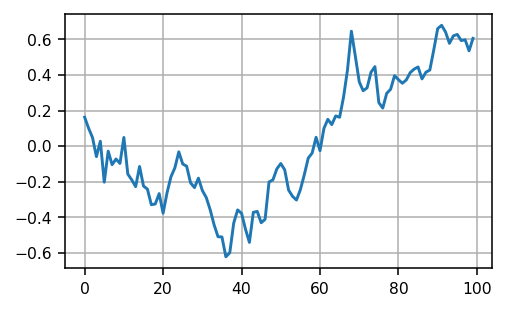

In [5]:
from matplotlib import pyplot as plt

plt.plot(Ws)
plt.grid(True)
plt.show()

* If drift $\mu$ and diffusion coefficient $\sigma$ are constant (i.e. deterministic and independent of both the time $t$ and the variable $X$), the process $X ( t )$ is called an arithmetic Brownian motion

$$dX ( t ) = \mu dt + \sigma dW (t) = \mu dt + \sigma \sqrt{t}\mathcal{N}(0,1)$$


* thus $X(t) ∼ \mathcal{N} ( \mu t, \sigma^2 t )$.


* Arithmetic Brownian motion can take negative values
    * process unsuitable for simulating asset prices; 
    * use Geometric Brownian Motion (GBM) instead.

### Log-normal Stochastic Differential Equation

* Stock prices deviate from a steady state as a result of the random fluctuations given by the trades. 


* Consider stock price $S_t$ (i.e. $S(t)$) and expected rate of return $\mu$, then the price relative change in a period $dt$ can be decomposed in two parts:
    * a deterministic part that is the expected return from the stock hold during the time period $dt$ ($\mu S_tdt$)
    * a stochastic part which reflects the random changes of the market (e.g. as a response to external effects such as unexpected news). A reasonable assumption is to take this contribution proportional to the stock ($\sigma S_tdW_t$ where $dW_t$ is a Wiener process).


* The resulting differential equation is:

$$dS_t = \mu S_tdt + \sigma S_tdW_t$$
or
$$\frac{dS_t}{S_t} = d\textrm{log}(S_t) = \mu dt + \sigma dW_t$$

* The solution of this SDE can be derived by applying the It$\hat{o}$'s formula (full derivation in the notes).

$$S_t = S_{t-1}e^{\big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma\epsilon\sqrt{dt}}$$

* As can be seen from the following equation:

$$d(\textrm{log} S_t) = \big(\mu - \frac{1}{2}\sigma^2\big)dt + \sigma Z\sqrt{dt}$$

* the change in $\textrm{log} S_t$ has a constant *drift* $\mu - \frac{1}{2}\sigma^2$ and a constance variance rate $\sigma^2$ (remember that $Z=\mathcal{N}(0,1)$) 
    * therefore $\textrm{log} S_t$ at some time $T$ is normally distributed with:

$$\textrm{log}S_t - \textrm{log}S_0 \approx\mathcal{N}\big[\big(\mu-\frac{\sigma^2}{2}\big)T, \sigma^2 T\big]$$

* **A variable whose logarithm is normally distributed is said to be log-normal**; 
    * lognormality is important because ensures a stock price will never be negative.


* Looking at the initial $dS$ equation we had that:

$$dS_t = \mu S_tdt + \sigma S_tdB_t$$

* which shows that the closer is $S_t$ to 0 the smaller is the $dS$ variation (so it will never go below 0).

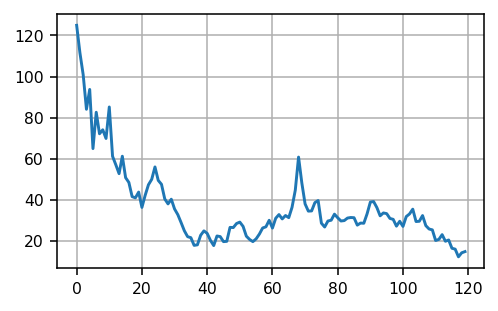

In [4]:
# stock price evolution
from numpy.random import normal, seed
from math import exp, sqrt

seed(1)
S = 100
mu = -0.01
sigma = 0.15
dT = 1
histo = []
for _ in range(120):
    S = S*exp((mu-0.5*sigma**2*dT)+sigma*sqrt(dT)*normal())
    histo.append(S)

plt.plot(histo)
plt.grid(True)
plt.show()

## Markov Chain

* A Markov chain is a mathematical system usually defined by
    * a collection of random variables, that transition from one state to another;
    * probabilistic rules that define the transitions between states.


* These set of transition rules satisfies the Markov property
    * the probability of transitioning to any particular state is dependent solely on the current state and time elapsed, and not on the sequence of state that preceded it.
    
    
* A discrete-time Markov chain involves a system which is in a certain state at each step (usually moments in time), with the state changing randomly between steps 

$$P ( X_{n + 1} ) = x | X_1 = x_1 , X_2 = x_2 , \ldots , X_n = x_n ) = P ( X_{n + 1} = x | X_n = x_n )$$

* Which means the knowledge of the previous state is all that is necessary to determine the probability distribution of the current state.

### The Markov Model

* The set of transition probabilities (the changes of state of the system) are usually put in matricial form: the *transition matrix*
    * each item can be read as the probability of going to state $X_{n + 1}$ given the current value of state $X_n$. 


* If the Markov chain has $N$ possible states, the matrix will be an $N\times N$ matrix
    * entry $( i, j )$ is the probability of transitioning from state $i$ to state $j$. 
    
    
$$\Pi = 
\begin{bmatrix}
p_{11} & p_{21} & p_{31} \\
p_{12} & p_{22} & p_{32} \\
p_{13} & p_{23} & p_{33}
\end{bmatrix} 
$$


* The model is characterized by: 
    * a state space (the set of possible state of the system);
    * a transition matrix escribing the probabilities of particular transitions; 
    * an initial state across the state space. 

#### Markov Chain to Predict Market Trends

* Markov chains can be used to model the probabilities of certain financial market climates and thus predicting the likelihood of future market conditions. 


* These conditions, also known as trends, are:
    * *bull markets*: periods of time where prices generally are rising (state 1);
    * *bear markets*: periods of time where prices generally are declining (state 2);
    * *stagnant markets*: periods of time where the market is characterized by neither a decline nor rise in general prices (state 3).


* The transition matrix of such trends can be inferred from the analysis of historical data.

<img src="markov_chain.png" width=500>

$$\Pi = 
\begin{bmatrix}
p_{11} & p_{21} & p_{31} \\
p_{12} & p_{22} & p_{32} \\
p_{13} & p_{23} & p_{33}
\end{bmatrix} =
\begin{bmatrix}
0.9 & 0.075 & 0.025 \\
0.15 & 0.8 & 0.05 \\
0.25 & 0.25 & 0.5
\end{bmatrix} 
$$

* $C$ is a $1 \times 3$ vector indicating the current state. 


* Assume today’s week the market is in a bearish state, resulting in the initial vector $C_0 = ( 0, 1, 0 )$.


* To calculate the probabilities of a bull, bear or stagnant week for any number of $n$ weeks into the future it is enough to multiply $C$ by the transition matrix $n$ times $(C_n = C_0 \cdot \Pi^n )$.

$$C_1 = C_0 \cdot \Pi =  
\begin{bmatrix}
0 \\
1 \\
0 
\end{bmatrix}
\begin{bmatrix}
0.9 & 0.075 & 0.025 \\
0.15 & 0.8 & 0.05 \\
0.25 & 0.25 & 0.5
\end{bmatrix} = 
\begin{bmatrix}
0.15 \\
0.8 \\
0.05 
\end{bmatrix}
$$

In [ ]:
import numpy as np

n = 50
C = np.array([0, 1, 0])
P = np.array([[0.9, 0.075, 0.025],[0.15, 0.8, 0.05],[0.25, 0.25, 0.5]])

for i in range(n):
    C = C.dot(P)
print (C)

[0.62499979 0.31250019 0.06250002]


* From this example it can be concluded that as $n\rightarrow\infty$, the probabilities will converge to
a steady state, meaning that 63% of all weeks will be bullish, 31% bearish and 6% stagnant.

![](markov_chain_sim.png)

* It can also be shown, by changing $C_0$, that the steady-state probabilities do not depend upon the initial state.


* The results can be used in various ways:
    * calculating the average time it takes for a bearish period to end;
    * the risk that a bullish market turns bearish or stagnant.

## Interest Rate Derivatives

### Interest Rate Swaps

* Interest rate swaps (IRS) consist of a floating leg and a fixed leg. The contract parameters are:
    * start date $d_0$
    * notional $N$
    * fixed rate $K$
    * floating rate tenor (months)
    * maturity (years)


* The floating leg pays the reference EURIBOR fixing at a frequency equal to the tenor of the floating rate
    * so for example an IRS on a 3-month EURIBOR will pay a floating coupon every three months, an IRS on 6-month EURIBOR pays the floating coupon every six months...


* The fixed leg pays a predetermined cash flow at annual frequency, regardless of the tenor of  the underlying floating rate
    * for simplicity we will only consider swaps with maturities which are multiples of 1 year.


* Before going on, we need to modify `generate_dates` to generate the payment dates for both the fixed and floating legs.

In [5]:
# modify generate_dates
from datetime import date
from dateutil.relativedelta import relativedelta

def generate_dates(start_date, nmonths, tenor=12):
    dates = []
    for i in range(0, nmonths, tenor):
        dates.append(start_date + relativedelta(months=i))
    dates.append(start_date + relativedelta(months=nmonths))
    return dates

generate_dates(date.today(), 15, 4)

[datetime.date(2021, 10, 10),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 6, 10),
 datetime.date(2022, 10, 10),
 datetime.date(2023, 1, 10)]

### Valuation

* Notation
    * $d_0=d_0^{\mathrm{fixed}},...,d_p^{\mathrm{fixed}}$ be the fixed leg payment dates;
    * $d_0=d_0^{\mathrm{float}},...,d_p^{\mathrm{float}}$ be the floating leg payment dates;
    * $d$ the pricing date;
    * $D(d, d')$ the discount factor observed in date $d$ for the value date $d'$;
    * $F(d, d', d'')$ the forward rate observed in date $d$ for the period $[d', d'']$;  
    * $\tau = d'' - d'$ the tenor.


* The NPV of the fixed leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{fixed}}(d; K) = N\cdot K\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})$$

* while the NPV of the floating leg is calculated as follows:

$$\mathrm{NPV}_{\mathrm{float}}(d) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})$$

* Therefore the NPV of the swap (seen from the point of view of the counter-party which receives the floating leg) is

$$\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d;K)$$

* It's actually more convenient to express the NPV of an IRS as a function of the fair value fixed rate $S$ of the IRS (**swap rate**)
    * $S$ is the value of $K$ which makes $\mathrm{NPV}(d)=0$.

$$\mathrm{NPV}_{\mathrm{fixed}}(d;S) = \mathrm{NPV}_{\mathrm{float}}(d)$$
<br>
$$N\cdot S\cdot\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}}) = N\cdot\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360} \cdot D(d, d_{i}^{\mathrm{float}})$$
<br>
$$S=\frac{\sum_{i=1}^{m}F(d, d_{j-1}^{\mathrm{float}}, d_{j}^{\mathrm{float}}) \cdot \frac{d_{j}^{\mathrm{float}}-d_{j-1}^{\mathrm{float}}}{360}
\cdot D(d, d_{i}^{\mathrm{float}})}{\sum_{i=1}^{n}D(d, d_i^{\mathrm{fixed}})} $$


* Once calculated $S$, we can express the $\mathrm{NPV}$ of an IRS as follows:

$$\begin{align}&\mathrm{NPV}(d; K) = \mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; K) = & \\ \\ &= \underbrace{\mathrm{NPV}_{\mathrm{float}}(d) - \mathrm{NPV}_{\mathrm{fixed}}(d; S)}_{\mathrm{=\;0}} + \mathrm{NPV}_{\mathrm{fixed}}(d;S) - \mathrm{NPV}_{\mathrm{fixed}}(d;K) & \\ & = N\cdot(S-K)\cdot\underbrace{\sum_{i=1}^{n}D(d, d_{i}^{\mathrm{fixed}})}_{\mathrm{'annuity'}}\end{align}$$

In [6]:
# implement InterestRateSwap 

class InterestRateSwap:
    def __init__(self, start_date, nominal, fixed_rate, tenor_months, maturity_years):
        self.nominal = nominal
        self.fixed_rate = fixed_rate
        self.fixed_leg_dates = generate_dates(start_date, 12 * maturity_years, 
                                              tenor_months)
        self.floating_leg_dates = generate_dates(start_date, 12 * maturity_years,
                                                 tenor_months)
                
    def annuity(self, discount_curve):
        a = 0
        for i in range(1, len(self.fixed_leg_dates)):
            a += discount_curve.df(self.fixed_leg_dates[i])
        return a

    def num(self, discount_curve, euribor_curve):
        s = 0
        for j in range(1, len(self.floating_leg_dates)):
            F = euribor_curve.forward_rate(self.floating_leg_dates[j-1], 
                                         self.floating_leg_dates[j])
            tau = (self.floating_leg_dates[j] - self.floating_leg_dates[j-1]).days / 360
            D = discount_curve.df(self.floating_leg_dates[j])
            s += F * tau * D
        return s
    
    def swap_rate(self, discount_curve, euribor_curve):
        num = self.num(discount_curve, euribor_curve)
        den = self.annuity(discount_curve)
        return num / den
        
    def npv(self, discount_curve, euribor_curve):
        S = self.swap_rate(discount_curve, euribor_curve)
        A = self.annuity(discount_curve)
        return self.nominal * (S - self.fixed_rate) * A

* The relevant inputs have been saved in [$\texttt{libor_curve.xlsx}$](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/libor_curve.xlsx) and [$\texttt{discount_curve.xlsx}$](https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/discount_curve.xlsx)


In [7]:
# import xlsx and define discount and libor curves
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
from finmarkets import DiscountCurve, ForwardRateCurve

discount_data = pd.read_excel("https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/discount_curve.xlsx")
discount_data.dropna(thresh=2, inplace=True)
euribor_data = pd.read_excel('https://github.com/matteosan1/finance_course/raw/develop/libro/input_files/libor_curve.xlsx')
euribor_data.dropna(thresh=2, inplace=True)
euribor_data['rate'] = euribor_data['rate']

dc = DiscountCurve(discount_data['pillars'].dt.date.tolist(), 
                   discount_data['discount_factors'].tolist())

fr = ForwardRateCurve(euribor_data['date'].dt.date.tolist(),
                      euribor_data['rate'].tolist())

print (dc.df(date.today() + relativedelta(months=1)))
print (fr.forward_rate(date.today(), date.today() + relativedelta(months=1)))

1.000666190046437
0.010007465753424658


* Test our class instantiating an IRS with 1M notional, fixed rate of 5%, 6 month tenor and a maturity of 4 years.

In [8]:
# test it
from dateutil.relativedelta import relativedelta

start_date = dc.start_date + relativedelta(months=1)
irs = InterestRateSwap(date.today(), 1e6, 0.02, 6, 4)
irs.npv(dc, fr)

-118442.03526571489

* Can you guess what could be the **swap rate** given the value obtained for the NPV ? 
    * in particular will it be higher or lower than the IRS fixed rate of 5% ?
    * (remember that we are looking at this contracts from the point of view of the receiver of the floating leg...)

In [100]:
# check the swap rate
irs.swap_rate(dc, fr)

0.005294473198275243

* To check if the we have computed correctly the swap rate we can instanciate a new IRS with fixed rate equal to the just calculated swap rate and print its NPV, it should come very close to 0.

In [102]:
# check NPV of new IRS
irs_new = InterestRateSwap(date.today(), 1e6, 0.005294, 6, 4)
irs_new.npv(dc, fr)

3.811258689309892

## Interest Rate Swaptions

* Swaptions are the equivalent of European options for the interest rate markets
    * they give the option holder the right but not the obligation, at the exercise date $d_{ex}$, to enter into an Interest Rate Swap at a pre-determined fixed rate.
    * the option holder will only choose to do this if the NPV of the underlying swap at $d_{ex}$ is positive.
    
    
* From the IRS NPV expression in terms of the swap rate $S$ therefore, we can see that the payoff of the swaption is

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d, d_i^{\mathrm{fixed}})$$

* The key issue is now to estimate $S(d_{\mathrm{ex}})$ in order to evaluate the payoff of a swaption. 


* This will be shown with two alternative approaches.

#### Evaluation through Black-Scholes formula

* Here we'll use a generalization of the Black-Scholes-Merton formula applied to swaptions:

$$\mathrm{NPV} = N\cdot A\cdot [S \Phi(d_+) - K\Phi(d_-)]$$

* where $\Phi$ represents the cumulative distribution function of the normal distribution

$$d_{\pm} = \frac{\mathrm{log}(\frac{S}{K}) \pm \frac{1}{2}\sigma^{2}T}{\sigma\sqrt{T}}\qquad(\sigma~\textrm{is the volatility of the swap rate})\\$$
$$A =\sum_{i=1}^{p}D(d, d_{i}^{\mathrm{fixed}})\qquad\mathrm{(annuity})$$


* Consider a swaption whose underlying 6M-IRS has a notional of 1M, fixed rate of 1%, a maturity of 4 years, and in addition a swap rate volatility of 7%.

In [10]:
# define function to compute swaption payoff
from math import log, sqrt
from scipy.stats import norm 

def swaptionPayoffBS(irs, dc, fr, sigma, T):
    N = irs.nominal
    K = irs.fixed_rate
    S = irs.swap_rate(dc, fr)
    A = irs.annuity(dc)
    dp = (log(S/K) + 0.5*sigma**2*T)/(sigma*sqrt(T))
    dm = (log(S/K) - 0.5*sigma**2*T)/(sigma*sqrt(T))
    print (dp, dm)
    return N*A*(S*norm.cdf(dp)-K*norm.cdf(dm))

pricing_date = date.today()
start_date = pricing_date + relativedelta(months=1)
irs = InterestRateSwap(start_date, 1e6, 0.04, 6, 4)
exercise_date = start_date
T = (exercise_date - pricing_date).days/365
sigma = 0.20
swaptionPayoffBS(irs, dc, fr, sigma, T)

-34.61814374491446 -34.67642976617147 1000000.0 8.05531637893769 0.005309124594035501 0.04


4.835691469355819e-261

#### Evaluation through Monte-Carlo Simulation

* Here it is assumed that the swap rate $S$ evolves following Vasicek Model

$$ dr = k(\theta-r)dt + \sigma dW$$

* 
    * its distribution at $d_{\mathrm{ex}}$ (exercise date) is $S(d_{\mathrm{ex}}) = S(d)\mathrm{exp}(-\frac{1}{2}\sigma^{2}T+\sigma\sqrt{T}\epsilon)$ where $\epsilon\approx\mathcal{N}(0,1)$;
    * notice that it is assumed that the *drift* rate in the evolution of the swap rate is zero.


* Given that the discounted payoff is given by:

$$N\cdot \mathrm{max}(0, S(d_{\mathrm{ex}}) - K)\cdot\sum D(d, d_i^{\mathrm{fixed}})$$

* To simulate the swap rate we can:
    1. sample the normal distribution $\mathcal{N}(0, 1)$ to calculate a large number of scenarios for $S(d_{\mathrm{ex}})$;
    2. evaluate the underlying swap's NPV at the exercise date, and consequently the swaption's payoff, for each scenario;
    3. take the average of these values to get the final estimate.

In [8]:
# implement MC swaption payoff
import numpy as np
from math import exp, sqrt
from numpy.random import normal, seed

def swap_rate_evolution(k, theta, sigma, r0, dt): 
  r_new = r0 + k*(theta - r0)*dt + sigma*np.random.normal()*np.sqrt(dt)
  return r_new

n_scenarios = 100000
payoffs = []
S0 = irs.swap_rate(dc, fr)
for _ in range(n_scenarios):
    S = swap_rate_evolution(0.02, 0.5, 0.07, S0, T)
    payoff = irs.nominal*max(0, S - irs.fixed_rate)*irs.annuity(dc)
    payoffs.append(payoff)

print (np.mean(payoffs))

NameError: ignored

### Confidence Interval
So let's calculate the 95% confidence level for the swaption simulation above.

In [ ]:
# calculate the MC error estimate as
# 95% confidence interval
interval = 1.96*np.std(payoffs)/sqrt(n_scenarios)
print ("{} +- {}".format(np.mean(payoffs), interval))

167085.00972089425 +- 30.830050973212675
